In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [4]:
# load data
data = pd.read_csv("admissionsData.csv")
languages = list(data["Language 1"])
total = len(languages)
uniqueLangs = []
counts = []
for lang in languages:
    if lang not in uniqueLangs:
        uniqueLangs.append(lang)
        counts.append(1)
    else:
        counts[uniqueLangs.index(lang)]+=1
#plt.pie(counts,labels=uniqueLangs)
#plt.show()

# finds all langs spoken at home
homeLangs1 = data[data["Language 1 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 1","Language 1 Proficiency"]]
homeLangs2 = data[data["Language 2 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 2","Language 2 Proficiency"]]
homeLangs3 = data[data["Language 3 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 3","Language 3 Proficiency"]]
homeLangs4 = data[data["Language 4 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 4","Language 4 Proficiency"]]
homeLangs5 = data[data["Language 5 Proficiency"].str.contains(r"Spoken at Home",na=False)][["Language 5","Language 5 Proficiency"]]
# num of total langs spoken at home
totalHomeLangs = float(len(homeLangs1)+len(homeLangs2)+len(homeLangs3)+len(homeLangs4)+len(homeLangs5))


# numbers of languages spoken at home
homeCounts = []
for lang in range(len(uniqueLangs)):
    homeCounts.append(0)
    homeCounts[lang]+= len(homeLangs1[homeLangs1["Language 1"]==uniqueLangs[lang]])
    homeCounts[lang]+= len(homeLangs2[homeLangs2["Language 2"]==uniqueLangs[lang]])
    homeCounts[lang]+= len(homeLangs3[homeLangs3["Language 3"]==uniqueLangs[lang]])
    homeCounts[lang]+= len(homeLangs4[homeLangs4["Language 4"]==uniqueLangs[lang]])
    homeCounts[lang]+= len(homeLangs5[homeLangs5["Language 5"]==uniqueLangs[lang]])

1    0.315789
Name: English, dtype: float64
1    0.157895
Name: Spanish, dtype: float64
1    0.140351
Name: Chinese, dtype: float64
1    0.087719
Name: Korean, dtype: float64
1    0.017544
Name: Arabic, dtype: float64
1    0.017544
Name: Portuguese, dtype: float64
1    0.017544
Name: Italian, dtype: float64
1    0.052632
Name: Chinglish, dtype: float64
1    0.035088
Name: Hindi, dtype: float64
1    0.017544
Name: Bambara, dtype: float64
1    0.035088
Name: Khmer, dtype: float64
1    0.017544
Name: Polish, dtype: float64
1    0.017544
Name: Albanian, dtype: float64
1    0.017544
Name: Bulgarian, dtype: float64
1    0.017544
Name: Burmese, dtype: float64
1    0.017544
Name: Pulaar, dtype: float64
1    0.017544
Name: Somali, dtype: float64


/var/folders/32/14wzkv1d38q3fxdwkkhh_dcr0000gn/T/ipykernel_3963/266670005.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ourHomePercents.append(float(ourHome[lang]))


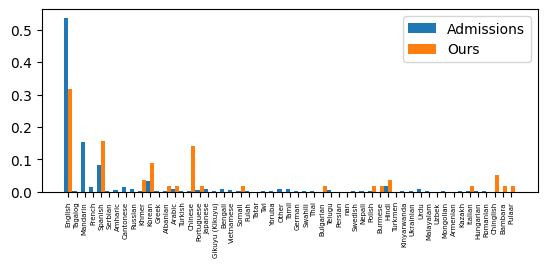

In [7]:
# percents of the langs spoken at home from admissions data
homePercents = []
for x in homeCounts:
    homePercents.append(float(x)/totalHomeLangs)

#plt.pie(homePercents,labels=uniqueLangs)
#plt.show()

# percents of langs spoken at home from our data
ourHome = pd.read_csv("percentData.csv")
ourHome = ourHome[ourHome["LANGUAGE"]=="What language do you speak at home?"]

# 
ourHomeLangs = ourHome.columns[1:]
allLangs = list(uniqueLangs)
for lang in ourHomeLangs:
    if(ourHome[lang].values[0]!=0):
        print(ourHome[lang])
        if lang not in allLangs:
            allLangs.append(lang)

for i in range(len(allLangs)-len(uniqueLangs)):
    homePercents.append(0)
ourHomePercents = []
for lang in allLangs:
    try:
        ourHomePercents.append(float(ourHome[lang]))
    except:
        ourHomePercents.append(0)

x_axis = np.arange(len(allLangs))
plt.bar(x_axis-0.25,homePercents,label="Admissions",width=0.5)
plt.bar(x_axis+0.25,ourHomePercents,label="Ours",width=0.5)
plt.xticks(x_axis,allLangs,rotation=90,fontsize=5)
plt.subplots_adjust(bottom=0.5)
plt.legend()
plt.show()

In [8]:
data["Admit Term"].value_counts()

Admit Term
Fall 2021    615
Fall 2022    605
Fall 2024    604
Fall 2020    592
Fall 2023    589
Name: count, dtype: int64